# 基于K-means的文本聚类

计算机学院 JohnsonGuo

任务：本作业将通过 K-means 算法对 20 Newsgroups 数据集中的文本数据进行聚类。首先是数据的预处理，提取文本特征；然后将数据转换为特征向量，使用 K-means 算法进行聚类；最后对聚类结果进行评估和可视化分析。

数据集：The 20 Newsgroups data set

要求：

1. 数据预处理：去除停用词、数字、符号等，提取文本特征。
2. 特征向量化：将预处理后的文本使用 TF-IDF 方法进行向量化。
3. K-means 模型训练：根据设定的 K 值，构建 K-means 模型，并对向量化的文本数据进行聚类。
4. 聚类结果分析：评估聚类结果，可使用轮廓系数、CH 指数等方法。
5. 可视化：使用降维方法（如 PCA 或 t-SNE）将高维数据降维至2D或3D，然后进行可视化，观察聚类效果。

首先，我们使用Python和一些相关的库来进行数据处理、特征提取、聚类和可视化。

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

数据加载和预处理

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# 加载数据集
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# 停用词、符号等的处理
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 分词
    tokens = word_tokenize(text.lower())
    # 去除停用词和符号
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    # 将文本重新组合成字符串
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# 对文本数据进行预处理
preprocessed_data = [preprocess_text(text) for text in newsgroups_data.data]

[nltk_data] Downloading package punkt to /Users/gwx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gwx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/gwx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


使用TF-IDF方法将预处理后的文本数据转换为特征向量。

In [3]:
# 特征向量化
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(preprocessed_data)

构建K-means模型并进行聚类。

In [4]:
# 构建K-means模型
k = 20  # 设置K值
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

KMeans(n_clusters=20, random_state=42)

对聚类结果进行评估。

In [5]:
# 评估聚类结果
silhouette_avg = silhouette_score(features, kmeans.labels_)
ch_score = calinski_harabasz_score(features.toarray(), kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", ch_score)

Silhouette Score: 0.006049551572918422
Calinski-Harabasz Score: 26.47324078206839


使用降维方法（如PCA或t-SNE）将高维数据降维至2D或3D，并进行可视化。

初始化降维
降维


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


可视化


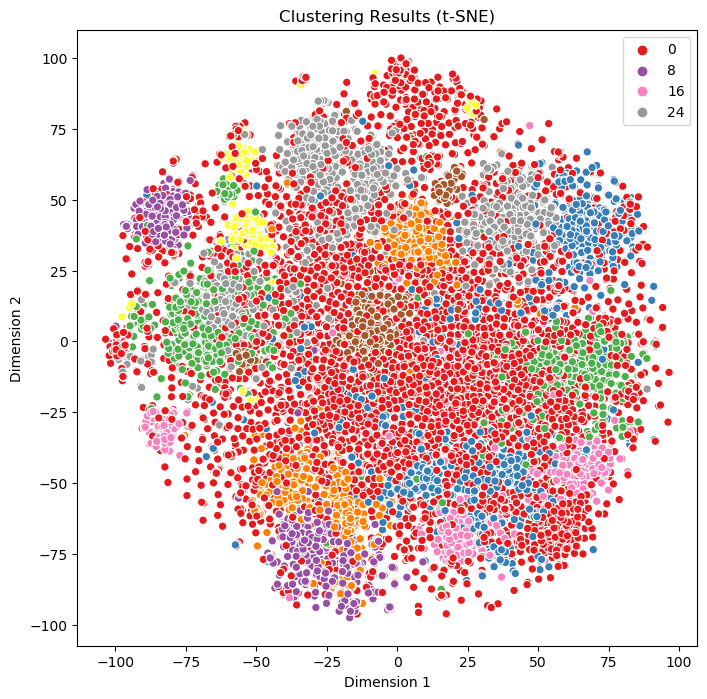

In [6]:
# 降维和可视化

# sample_size = 5000  # 采样数量
# sample_indices = np.random.choice(features.shape[0], size=sample_size, replace=False)
# sample_features = features[sample_indices]

# tsne = TSNE(n_components=2, random_state=42)
# reduced_features = tsne.fit_transform(sample_features.toarray())

# # 可视化聚类结果
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=kmeans.labels_[sample_indices], palette='Set1')
# plt.title('Clustering Results (t-SNE)')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.show()


feature_array = features.toarray()
print("初始化降维")
tsne = TSNE(n_components=2, random_state=42)
print("降维")
reduced_features = tsne.fit_transform(feature_array)

# 可视化聚类结果
print("可视化")
plt.figure(figsize=(8, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=kmeans.labels_, palette='Set1')
plt.title('Clustering Results (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
